In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import update_states_name


#input custom functions
from noten_data import noten_2010, noten_2011, noten_2012, noten_2013, noten_2014, noten_2015, noten_2016, noten_2017, noten_2018, noten_2019, noten_2020, noten_2021, noten_2022
noten_concat = pd.concat([noten_2010, noten_2011, noten_2012,
                          noten_2013, noten_2014, noten_2015,
                          noten_2016, noten_2017, noten_2018,
                          noten_2019, noten_2020, noten_2021,
                          noten_2022
                          ], ignore_index=True)



/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  noten_data.iloc[:, 1:] = noten_data.iloc[:, 1:].apply(lambda x: x.str.replace('.', ''))
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  noten_data.iloc[:, 0:] = noten_data.iloc[:, 0:].astype(int)
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treate

In [2]:
noten_concat = update_states_name.update_names(noten_concat)

In [3]:
noten_concat

,Federal States,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,year
0,Baden-Wüttemberg,591,371,555,722,942,1141,1252,1514,1716,...,1900,1587,1213,851,447,142,19,3,1,2010-01-01
1,Bayern,353,343,446,665,747,963,1106,1362,1581,...,1369,1070,809,639,359,164,36,6,8,2010-01-01
2,Berlin,125,96,126,211,225,254,330,378,446,...,590,507,341,209,113,30,6,0,0,2010-01-01
3,Brandenburg,156,125,145,190,236,323,284,350,348,...,413,378,238,160,65,18,4,1,0,2010-01-01
4,Bremen,31,20,40,57,77,90,80,100,104,...,139,127,69,66,36,15,5,1,1,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Saarland,138,57,83,81,100,94,118,131,133,...,110,83,57,40,12,4,0,0,0,2022-01-01
204,Sachsen,542,266,388,477,486,571,624,640,680,...,265,162,97,32,16,3,0,0,0,2022-01-01
205,Sachsen-Anhalt,176,100,132,151,172,194,179,216,237,...,170,119,63,41,1,0,0,0,0,2022-01-01
206,Schleswig-Holstein,224,129,178,197,239,305,346,364,409,...,488,382,293,210,108,41,23,1,3,2022-01-01


#### Federal State with the highest % of grade 1

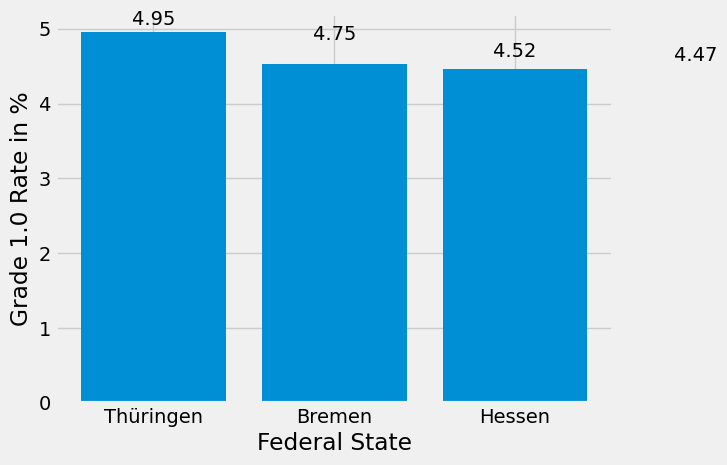

In [52]:
# Group by Federal State and year, and calculate the percentage of exams with Grade 1.0
noten_concat['Exams Grade 1.0 Percentage'] = (noten_concat['Exams Grade 1.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Sort the DataFrame by percentage in grade 1.0 in descending order
df = noten_concat.sort_values('Exams Grade 1.0 Percentage', ascending=False)

# Limit the DataFrame to top 3 rows
df = df.head(4)

# Create a bar chart
plt.bar(df['Federal States'], df['Exams Grade 1.0 Percentage'])
plt.xlabel('Federal State')
plt.ylabel('Grade 1.0 Rate in %')
#ax.set_title('Top 3 Federal States with Highest Percentage in Grade 1.0')

# Add value labels on top of each bar
for i, v in enumerate(df['Exams Grade 1.0 Percentage']):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()


In [41]:
# Group by 'Year' and calculate percentage of exam grade 1.0
noten_concat['Exams Grade 1.0 Percentage'] = (noten_concat['Exams Grade 1.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the highest percentage of exam grade 1.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 1.0 Percentage'] == x['Exams Grade 1.0 Percentage'].max()])

result[['Federal States', 'Exams Grade 1.0 Percentage']]

,,Federal States,Exams Grade 1.0 Percentage
year,,,
2010-01-01,15,Thüringen,1.851285
2011-01-01,31,Thüringen,2.345924
2012-01-01,47,Thüringen,3.003120
2013-01-01,63,Thüringen,2.570093
2014-01-01,79,Thüringen,2.792600
2015-01-01,95,Thüringen,3.095926
2016-01-01,111,Thüringen,2.896387
2017-01-01,127,Thüringen,2.557506
2018-01-01,143,Thüringen,2.535297


In [43]:
result['Exams Grade 1.0 Percentage'].max()

,Exams Grade 1.0 Percentage
count,13.000000
mean,3.041492
std,0.881842
min,1.851285
25%,2.557506
50%,2.896387
75%,3.095926
max,4.953018


#### Federal State with the lowest % of grade 1

In [6]:
# Group by 'Year' and calculate percentage of exam grade 1.0
noten_concat['Exams Grade 1.0 Percentage'] = (noten_concat['Exams Grade 1.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the lowest percentage of exam grade 1.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 1.0 Percentage'] == x['Exams Grade 1.0 Percentage'].min()])

result[['year', 'Federal States', 'Exams Grade 1.0 Percentage']]


,,year,Federal States,Exams Grade 1.0 Percentage
year,,,,
2010-01-01,14,2010-01-01,Schleswig-Holstein,0.528801
2011-01-01,24,2011-01-01,Niedersachsen,0.606226
2012-01-01,40,2012-01-01,Niedersachsen,0.544642
2013-01-01,56,2013-01-01,Niedersachsen,0.664515
2014-01-01,72,2014-01-01,Niedersachsen,0.781178
2015-01-01,88,2015-01-01,Niedersachsen,0.781759
2016-01-01,104,2016-01-01,Niedersachsen,0.912600
2017-01-01,126,2017-01-01,Schleswig-Holstein,0.820901
2018-01-01,142,2018-01-01,Schleswig-Holstein,0.844372


#### Federal State with the highest % of grade 2

In [7]:
# Group by 'Year' and calculate percentage of exam grade 2.0
noten_concat['Exams Grade 2.0 Percentage'] = (noten_concat['Exams Grade 2.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the highest percentage of exam grade 1.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 2.0 Percentage'] == x['Exams Grade 2.0 Percentage'].max()])

result[['year', 'Federal States', 'Exams Grade 2.0 Percentage']]

,,year,Federal States,Exams Grade 2.0 Percentage
year,,,,
2010-01-01,7,2010-01-01,Mecklenburg-Vorpommern,4.945350
2011-01-01,31,2011-01-01,Thüringen,5.387674
2012-01-01,47,2012-01-01,Thüringen,5.109204
2013-01-01,63,2013-01-01,Thüringen,5.295950
2014-01-01,79,2014-01-01,Thüringen,5.265030
2015-01-01,95,2015-01-01,Thüringen,5.165223
2016-01-01,111,2016-01-01,Thüringen,5.449388
2017-01-01,115,2017-01-01,Brandenburg,5.321007
2018-01-01,143,2018-01-01,Thüringen,5.404585


#### Federal State with the highest % of grade 3

In [9]:
# Group by 'Year' and calculate percentage of exam grade 3.0
noten_concat['Exams Grade 3.0 Percentage'] = (noten_concat['Exams Grade 3.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the highest percentage of exam grade 3.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 3.0 Percentage'] == x['Exams Grade 3.0 Percentage'].max()])

result[['year', 'Federal States', 'Exams Grade 3.0 Percentage']]

,,year,Federal States,Exams Grade 3.0 Percentage
year,,,,
2010-01-01,14,2010-01-01,Schleswig-Holstein,6.430595
2011-01-01,24,2011-01-01,Niedersachsen,6.232766
2012-01-01,40,2012-01-01,Niedersachsen,6.431675
2013-01-01,62,2013-01-01,Schleswig-Holstein,6.968464
2014-01-01,72,2014-01-01,Niedersachsen,6.095038
2015-01-01,88,2015-01-01,Niedersachsen,6.070477
2016-01-01,104,2016-01-01,Niedersachsen,6.062057
2017-01-01,126,2017-01-01,Schleswig-Holstein,5.974731
2018-01-01,142,2018-01-01,Schleswig-Holstein,5.941591


In [8]:
# Group by 'Year' and calculate percentage of exam grade 4.0
noten_concat['Exams Grade 4.0 Percentage'] = (noten_concat['Exams Grade 4.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the highest percentage of exam grade 4.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 4.0 Percentage'] == x['Exams Grade 4.0 Percentage'].max()])

result[['year', 'Federal States', 'Exams Grade 4.0 Percentage']]


,,year,Federal States,Exams Grade 4.0 Percentage
year,,,,
2010-01-01,10,2010-01-01,Rheinland-Pfalz,0.095481
2011-01-01,30,2011-01-01,Schleswig-Holstein,0.092721
2012-01-01,46,2012-01-01,Schleswig-Holstein,0.072040
2013-01-01,62,2013-01-01,Schleswig-Holstein,0.076297
2014-01-01,74,2014-01-01,Rheinland-Pfalz,0.055310
2015-01-01,90,2015-01-01,Rheinland-Pfalz,0.041252
2016-01-01,106,2016-01-01,Rheinland-Pfalz,0.059267
2017-01-01,126,2017-01-01,Schleswig-Holstein,0.114212
2018-01-01,132,2018-01-01,Bremen,0.148203


In [21]:
# Group by 'Year' and calculate percentage of exam grade 1.0
noten_concat['Exams Grade 2.0 Percentage'] = (noten_concat['Exams Grade 2.0'] / (noten_concat['Exams Grade 1.0'] + noten_concat['Exams Grade 1.1'] + noten_concat['Exams Grade 1.2'] + noten_concat['Exams Grade 1.3'] + noten_concat['Exams Grade 1.4'] + noten_concat['Exams Grade 1.5'] + noten_concat['Exams Grade 1.6'] + noten_concat['Exams Grade 1.7'] + noten_concat['Exams Grade 1.8'] + noten_concat['Exams Grade 1.9'] + noten_concat['Exams Grade 2.0'] + noten_concat['Exams Grade 2.1'] + noten_concat['Exams Grade 2.2'] + noten_concat['Exams Grade 2.3'] + noten_concat['Exams Grade 2.4'] + noten_concat['Exams Grade 2.5'] + noten_concat['Exams Grade 2.6'] + noten_concat['Exams Grade 2.7'] + noten_concat['Exams Grade 2.8'] + noten_concat['Exams Grade 2.9'] + noten_concat['Exams Grade 3.0'] + noten_concat['Exams Grade 3.1'] + noten_concat['Exams Grade 3.2'] + noten_concat['Exams Grade 3.3'] + noten_concat['Exams Grade 3.4'] + noten_concat['Exams Grade 3.5'] + noten_concat['Exams Grade 3.6'] + noten_concat['Exams Grade 3.7'] + noten_concat['Exams Grade 3.8'] + noten_concat['Exams Grade 3.9'] + noten_concat['Exams Grade 4.0'] )) * 100

# Find the federal state with the highest percentage of exam grade 1.0 for each year
result = noten_concat.groupby('year').apply(lambda x: x[x['Exams Grade 2.0 Percentage'] == x['Exams Grade 2.0 Percentage'].max()])

result[['year', 'Federal States', 'Exams Grade 2.0 Percentage']]

,,year,Federal States,Exams Grade 2.0 Percentage
year,,,,
2010-01-01,7,2010-01-01,MV,4.945350
2011-01-01,31,2011-01-01,TH,5.387674
2012-01-01,47,2012-01-01,TH,5.109204
2013-01-01,63,2013-01-01,TH,5.295950
2014-01-01,79,2014-01-01,TH,5.265030
2015-01-01,95,2015-01-01,TH,5.165223
2016-01-01,111,2016-01-01,TH,5.449388
2017-01-01,115,2017-01-01,BB,5.321007
2018-01-01,143,2018-01-01,TH,5.404585


In [16]:
import pandas as pd

# create a dataframe with the given data
data = {
    'Federal States': ['Baden-Wüttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen'],
    'Exam Grade 1.0': [591, 353, 125, 156, 31, 141, 281, 63, 193, 763],
    'Exam Grade 1.1': [371, 343, 96, 125, 20, 111, 221, 49, 150, 603],
    'Exam Grade 3.9': [3, 6, 0, 1, 1, 4, 0, 0, 2, 23],
    'Grade 4.0': [1, 8, 0, 0, 1, 0, 0, 0, 0, 12],
    'year': ['2010-01-01'] * 10
}
df = pd.DataFrame(data)

# convert year column to datetime type
df['year'] = pd.to_datetime(df['year'])

# calculate percent of exams with grade 1.0 for each year
df['percent 1.0'] = df['Exam Grade 1.0'] / (df['Exam Grade 1.0'] + df['Exam Grade 1.1'] + df['Exam Grade 3.9'] + df['Grade 4.0']) * 100

# group by year and print percent of exams with grade 1.0 for each year
grouped_df = df.groupby('year')
for year, group in grouped_df:
    print(f"Year: {year.year}")
    print(group[['Federal States', 'percent 1.0']])
    print()


Year: 2010
           Federal States  percent 1.0
0        Baden-Wüttemberg    61.180124
1                  Bayern    49.718310
2                  Berlin    56.561086
3             Brandenburg    55.319149
4                  Bremen    58.490566
5                 Hamburg    55.078125
6                  Hessen    55.976096
7  Mecklenburg-Vorpommern    56.250000
8           Niedersachsen    55.942029
9     Nordrhein-Westfalen    54.461099



In [19]:
import pandas as pd

# Define the data as a dictionary
data = {'Federal States': ['Baden-Wüttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen'],
        'Exam Grade 1.0': [591, 353, 125, 156, 31, 141, 281, 63, 193, 763],
        'Exam Grade 1.1': [371, 343, 96, 125, 20, 111, 221, 49, 150, 603],
        'Exam Grade 3.9': [3, 6, 0, 1, 1, 4, 0, 0, 2, 23],
        'Grade 4.0': [1, 8, 0, 0, 1, 0, 0, 0, 0, 12],
        'Year': ['2010-01-01', '2010-01-01', '2011-01-01', '2011-01-01', '2013-01-01', '2013-01-01', '2014-01-01', '2014-01-01', '2015-01-01', '2015-01-01']}

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Group by 'Year' and 'Federal States' and calculate the percentage of exams with grade 1.0
df['Percent_Exam_Grade_1.0'] = (df['Exam Grade 1.0'] / (df['Exam Grade 1.0'] + df['Exam Grade 1.1'] + df['Exam Grade 3.9'] + df['Grade 4.0'])) * 100

# Print the result
print(df[['Year', 'Federal States', 'Percent_Exam_Grade_1.0']])


         Year          Federal States  Percent_Exam_Grade_1.0
0  2010-01-01        Baden-Wüttemberg               61.180124
1  2010-01-01                  Bayern               49.718310
2  2011-01-01                  Berlin               56.561086
3  2011-01-01             Brandenburg               55.319149
4  2013-01-01                  Bremen               58.490566
5  2013-01-01                 Hamburg               55.078125
6  2014-01-01                  Hessen               55.976096
7  2014-01-01  Mecklenburg-Vorpommern               56.250000
8  2015-01-01           Niedersachsen               55.942029
9  2015-01-01     Nordrhein-Westfalen               54.461099


In [18]:
df

,Federal States,Exam Grade 1.0,Exam Grade 1.1,Exam Grade 3.9,Grade 4.0,year,percent 1.0
0,Baden-Wüttemberg,591,371,3,1,2010-01-01,61.180124
1,Bayern,353,343,6,8,2010-01-01,49.718310
2,Berlin,125,96,0,0,2010-01-01,56.561086
3,Brandenburg,156,125,1,0,2010-01-01,55.319149
4,Bremen,31,20,1,1,2010-01-01,58.490566
5,Hamburg,141,111,4,0,2010-01-01,55.078125
6,Hessen,281,221,0,0,2010-01-01,55.976096
7,Mecklenburg-Vorpommern,63,49,0,0,2010-01-01,56.250000
8,Niedersachsen,193,150,2,0,2010-01-01,55.942029
9,Nordrhein-Westfalen,763,603,23,12,2010-01-01,54.461099


In [12]:
noten_concat.columns

Index(['Federal States', 'Exams Grade 1.0', 'Exams Grade 1.1',
       'Exams Grade 1.2', 'Exams Grade 1.3', 'Exams Grade 1.4',
       'Exams Grade 1.5', 'Exams Grade 1.6', 'Exams Grade 1.7',
       'Exams Grade 1.8', 'Exams Grade 1.9', 'Exams Grade 2.0',
       'Exams Grade 2.1', 'Exams Grade 2.2', 'Exams Grade 2.3',
       'Exams Grade 2.4', 'Exams Grade 2.5', 'Exams Grade 2.6',
       'Exams Grade 2.7', 'Exams Grade 2.8', 'Exams Grade 2.9',
       'Exams Grade 3.0', 'Exams Grade 3.1', 'Exams Grade 3.2',
       'Exams Grade 3.3', 'Exams Grade 3.4', 'Exams Grade 3.5',
       'Exams Grade 3.6', 'Exams Grade 3.7', 'Exams Grade 3.8',
       'Exams Grade 3.9', 'Exams Grade 4.0', 'year'],
      dtype='object', name=' ')

In [5]:
noten_concat[noten_concat["Federal States"] == 'HH']

,Federal States,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,year
5,HH,141,111,148,190,241,317,330,365,427,...,613,540,412,313,198,64,15,4,0,2010-01-01
21,HH,95,69,88,108,144,185,209,214,272,...,394,304,258,158,95,31,9,1,0,2011-01-01
37,HH,113,90,107,123,173,196,205,269,287,...,371,334,255,157,82,40,0,2,2,2012-01-01
53,HH,111,82,116,148,180,210,235,245,322,...,378,301,255,189,99,43,4,0,2,2013-01-01
69,HH,139,75,116,153,188,214,232,280,328,...,378,330,236,166,76,22,4,1,1,2014-01-01
85,HH,158,110,140,156,201,245,267,307,381,...,407,339,244,178,88,34,9,2,0,2015-01-01
101,HH,137,93,137,184,217,268,283,317,353,...,481,401,304,191,90,26,7,1,0,2016-01-01
117,HH,150,89,119,194,196,234,296,310,354,...,407,361,288,152,75,29,7,1,0,2017-01-01
133,HH,159,114,126,175,203,272,312,311,338,...,368,349,250,188,92,32,2,0,0,2018-01-01
149,HH,141,103,131,188,210,235,289,285,336,...,380,312,262,164,95,29,8,2,0,2019-01-01


In [4]:
#noten_concat.to_csv('/Users/kamilkarim/neuefische/capstone_project_hh_23_1/Tableau/exams_grades_kk.csv', index=False)

In [11]:
noten_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Federal States  208 non-null    object        
 1   1.0             208 non-null    int64         
 2   1.1             208 non-null    int64         
 3   1.2             208 non-null    int64         
 4   1.3             208 non-null    int64         
 5   1.4             208 non-null    int64         
 6   1.5             208 non-null    int64         
 7   1.6             208 non-null    int64         
 8   1.7             208 non-null    int64         
 9   1.8             208 non-null    int64         
 10  1.9             208 non-null    int64         
 11  2.0             208 non-null    int64         
 12  2.1             208 non-null    int64         
 13  2.2             208 non-null    int64         
 14  2.3             208 non-null    int64         
 15  2.4   

Short explanation of the describe measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set

In [8]:
noten_concat.describe()

,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,365.826923,229.673077,308.076923,383.514423,453.427885,538.019231,610.288462,688.024038,765.346154,848.283654,...,960.168269,869.331731,736.500000,567.264423,390.033654,206.341346,79.504808,18.524038,3.081731,2.557692
std,429.277113,250.901272,335.323874,411.335236,474.989504,565.334341,644.755883,722.596662,802.096658,902.334836,...,1082.999817,1009.282230,897.808706,728.912877,545.895722,316.725767,137.611404,35.987778,6.045564,4.825109
min,31.000000,20.000000,33.000000,43.000000,56.000000,60.000000,70.000000,68.000000,80.000000,97.000000,...,109.000000,89.000000,50.000000,33.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,112.750000,75.000000,103.250000,128.750000,157.250000,178.000000,205.000000,228.250000,253.750000,269.750000,...,227.250000,193.000000,150.000000,97.000000,50.750000,20.000000,5.000000,0.750000,0.000000,0.000000
50%,193.500000,131.000000,178.000000,215.000000,259.000000,305.500000,333.000000,379.000000,421.000000,457.000000,...,511.000000,459.500000,380.000000,290.500000,188.500000,91.000000,29.500000,5.500000,1.000000,0.000000
75%,430.500000,280.000000,367.750000,458.250000,543.750000,651.500000,741.000000,799.250000,901.250000,1019.750000,...,1174.750000,1062.000000,892.500000,672.750000,436.750000,227.250000,90.250000,23.000000,3.000000,3.000000
max,2436.000000,1277.000000,1758.000000,2254.000000,2563.000000,3117.000000,3552.000000,3907.000000,4412.000000,4968.000000,...,6039.000000,5562.000000,5123.000000,4220.000000,3034.000000,1756.000000,840.000000,252.000000,44.000000,26.000000


In [ ]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

In [ ]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x=noten_concat['year'], y=noten_concat['1.0']) # create countplot
f1.tick_params(axis=('both'), rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
#f1.set_ylabel("Students that Graduated with 1 throughout the years", fontsize = 10); # set label for y-axis
f1.set_title('Students that Graduated with 1 throughout the years', fontsize=15); # set title
plt.show()